In [1]:
import pandas as pd
import numpy as np

In [2]:
#import datasets to dataframe
kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

In [3]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
15556,False,NaN,0,"[{'id': 28, 'name': 'Action'}]",NaN,38022,tt0075669,hi,अमर अकबर एन्थोनी,Amar Akbar Anthony (Hindi: अमर अकबर अन्थोनी) i...,...,1977-01-02,0.0,184.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Amar Akbar Anthony,False,6.9,16.0
25172,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",NaN,211247,tt3091272,ko,사이비,A convict returns to his home town to torturin...,...,2013-11-21,0.0,101.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,The Fake,False,6.7,10.0
5772,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,37335,tt0083260,fr,Les uns et les autres,"The film follows four families, with different...",...,1981-05-27,0.0,184.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,The film is a musical epic and it is widely co...,Bolero: Dance of Life,False,7.4,7.0
33399,False,NaN,0,[],NaN,133560,tt0053989,ja,乾いた湖,A reckless student contemplates terrorism in a...,...,1960-08-30,0.0,89.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Youth in Fury,False,7.0,1.0
29564,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,56153,tt0068950,it,Mimì metallurgico ferito nell'onore,Mimi is a Sicilian dockworker who loses his jo...,...,1972-01-01,0.0,121.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Seduction of Mimi,False,6.5,13.0


In [4]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
467487,4849,109487,4.5,1454740745
11286752,117092,5903,3.5,1193393752
9926086,102278,3893,4.0,975002927
6988203,72067,172,4.0,1089928461
6054753,62367,111362,5.0,1447857786


In [5]:
# ------------ Extract Kaggle Data

In [6]:
# cleaning begin here (converting strings to correct data types)

In [7]:
# 1) if CSV file -> check if all of the columns came in as the correct data types
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [8]:
# object data type is usually for strings
# Only 4 columns have correct types (revenue, runtime, vote_average, vote_count)
# Find the correct types of following columns

In [9]:
kaggle_metadata['popularity'] # we need to convert numeric values

0        21.946943
1        17.015539
2          11.7129
3         3.859495
4         8.387519
           ...    
45461     0.072051
45462     0.178241
45463     0.903007
45464     0.003503
45465     0.163015
Name: popularity, Length: 45466, dtype: object

In [10]:
kaggle_metadata['adult'] # this is supposed to be Boolean

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: adult, Length: 45466, dtype: object

In [11]:
kaggle_metadata['budget'] # tis is supposed to be numeric values

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object

In [12]:
kaggle_metadata['video']

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45466, dtype: object

In [13]:
kaggle_metadata['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [14]:
kaggle_metadata['id']

0           862
1          8844
2         15602
3         31357
4         11862
          ...  
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45466, dtype: object

In [15]:
# Check all the values are either True or False before converting
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [16]:
# Remove the bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Keep the movies with adult = False and drop the adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [18]:
# Clean the video column
# Create a Boolean column for 'video' (assign it back to the same column)
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [19]:
# Convert columns to numeric values
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [20]:
# Convert release date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [21]:
# Check rating data
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
userId       26024289 non-null int64
movieId      26024289 non-null int64
rating       26024289 non-null float64
timestamp    26024289 non-null int64
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [22]:
# Store the ratings data into its own SQL
# Convert timestamp to a datetime data type
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [23]:
# Assign the converted timestamp to the column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

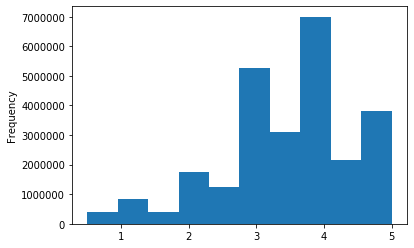

In [26]:
# Look at the statistics/plot for any errors
ratings['rating'].plot(kind='hist')

In [25]:
ratings['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64